In [4]:
from pose import PoseEstimator

pose = PoseEstimator()
pose.predict("attack/WhatsApp Image 2025-10-13 at 6.00.20 PM (2).jpeg")

# Show image with labeled keypoints
# pose.show_image()

# # Get keypoints dictionary for ML
# keypoints_dicts = pose.keypoints_to_dict()
# for i, person in enumerate(keypoints_dicts):
#     print(f"Person {i+1}:")
#     for part, values in person.items():
#         print(f"  {part}: x_norm={values[0]:.2f}, y_norm={values[1]:.2f}, conf={values[2]:.2f}")

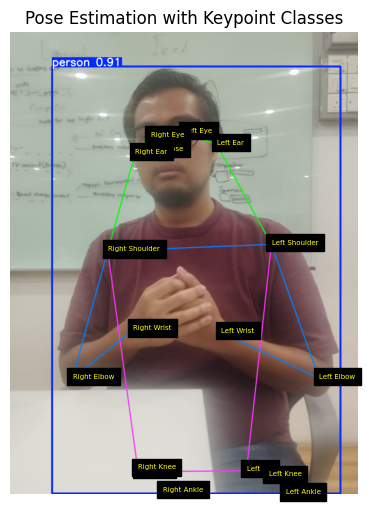

In [5]:
pose.show_image()

In [ ]:
pose

In [ ]:
import os
from pose import PoseEstimator

# Path to folder with images
image_folder = "idea/"
image_files = [os.path.join(image_folder, f) 
               for f in os.listdir(image_folder) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp'))]

pose = PoseEstimator()

all_keypoints_dicts = []

all_result = []

for img_path in image_files:
    pose.predict(img_path)
    pose.show_image()

In [ ]:
pose.keypoints_to_dict()

In [ ]:
pose.results_dict

In [ ]:
pose.keypoints_to_dataframe()

In [ ]:
nose_x = pose.results_dict['Nose'][0]
nose_y = pose.results_dict['Nose'][1]
nose_conf = pose.results_dict['Nose'][2]

left_eye_x = pose.results_dict['Left Eye'][0]
left_eye_y = pose.results_dict['Left Eye'][1]
left_eye_conf = pose.results_dict['Left Eye'][2]

right_eye_x = pose.results_dict['Right Eye'][0]
right_eye_y = pose.results_dict['Right Eye'][1]
right_eye_conf = pose.results_dict['Right Eye'][2]

left_ear_x = pose.results_dict['Left Ear'][0]
left_ear_y = pose.results_dict['Left Ear'][1]
left_ear_conf = pose.results_dict['Left Ear'][2]

right_ear_x = pose.results_dict['Right Ear'][0]
right_ear_y = pose.results_dict['Right Ear'][1]
right_ear_conf = pose.results_dict['Right Ear'][2]

left_shoulder_x = pose.results_dict['Left Shoulder'][0]
left_shoulder_y = pose.results_dict['Left Shoulder'][1]
left_shoulder_conf = pose.results_dict['Left Shoulder'][2]

right_shoulder_x = pose.results_dict['Right Shoulder'][0]
right_shoulder_y = pose.results_dict['Right Shoulder'][1]
right_shoulder_conf = pose.results_dict['Right Shoulder'][2]

left_elbow_x = pose.results_dict['Left Elbow'][0]
left_elbow_y = pose.results_dict['Left Elbow'][1]
left_elbow_conf = pose.results_dict['Left Elbow'][2]

right_elbow_x = pose.results_dict['Right Elbow'][0]
right_elbow_y = pose.results_dict['Right Elbow'][1]
right_elbow_conf = pose.results_dict['Right Elbow'][2]

left_wrist_x = pose.results_dict['Left Wrist'][0]
left_wrist_y = pose.results_dict['Left Wrist'][1]
left_wrist_conf = pose.results_dict['Left Wrist'][2]

right_wrist_x = pose.results_dict['Right Wrist'][0]
right_wrist_y = pose.results_dict['Right Wrist'][1]
right_wrist_conf = pose.results_dict['Right Wrist'][2]

left_hip_x = pose.results_dict['Left Hip'][0]
left_hip_y = pose.results_dict['Left Hip'][1]
left_hip_conf = pose.results_dict['Left Hip'][2]

right_hip_x = pose.results_dict['Right Hip'][0]
right_hip_y = pose.results_dict['Right Hip'][1]
right_hip_conf = pose.results_dict['Right Hip'][2]

left_knee_x = pose.results_dict['Left Knee'][0]
left_knee_y = pose.results_dict['Left Knee'][1]
left_knee_conf = pose.results_dict['Left Knee'][2]

right_knee_x = pose.results_dict['Right Knee'][0]
right_knee_y = pose.results_dict['Right Knee'][1]
right_knee_conf = pose.results_dict['Right Knee'][2]

left_ankle_x = pose.results_dict['Left Ankle'][0]
left_ankle_y = pose.results_dict['Left Ankle'][1]
left_ankle_conf = pose.results_dict['Left Ankle'][2]


In [ ]:
pose.keypoints_to_dict()

In [ ]:
pip install seaborn

In [ ]:
import os
from pose import PoseEstimator

# Path to folder with images
image_folder = "idea/"
image_files = [os.path.join(image_folder, f) 
               for f in os.listdir(image_folder) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.webp'))]

pose = PoseEstimator()

all_keypoints_dicts = []

for img_path in image_files:
    print(f"Processing: {img_path}")
    
    # Predict
    pose.predict(img_path)
    
    # Show image with labeled keypoints
    pose.show_image()
    
    # Get keypoints dictionary for ML
    keypoints_dicts = pose.keypoints_to_dict()
    all_keypoints_dicts.extend(keypoints_dicts)  # accumulate all people across all images
    
    # Optional: print keypoints for each person
    for i, person in enumerate(keypoints_dicts):
        print(f"Person {i+1} in {os.path.basename(img_path)}:")
        for part, values in person.items():
            print(f"  {part}: x_norm={values[0]:.2f}, y_norm={values[1]:.2f}, conf={values[2]:.2f}")


In [ ]:
ls

In [ ]:
from pose import PoseEstimator

pose = PoseEstimator()
pose.predict("happiness-people-concept-smiling-man-with-crossed-arms_380164-55094.jpg")

# Show image with labeled keypoints
pose.show_image()

# Get keypoints dictionary for ML
keypoints_dicts = pose.keypoints_to_dict()
for i, person in enumerate(keypoints_dicts):
    print(f"Person {i+1}:")
    for part, values in person.items():
        print(f"  {part}: x_norm={values[0]:.2f}, y_norm={values[1]:.2f}, conf={values[2]:.2f}")